In [18]:
import numpy as np
import pandas as pd
import os
import globals as gl
import matplotlib.pyplot as plt
import warnings
import PcmPy as pcm
from matplotlib.lines import Line2D
import pickle

warnings.filterwarnings('ignore')
plt.style.use('default')

In [19]:
until_day = 24
days = np.arange(1, until_day + 1, 1)
sns = [101, 102, 103, 104, 105]
glm = 1


trained vs. untrained, day1: tval=-0.018, pval=0.986
trained vs. untrained, day2: tval=3.338, pval=0.029
trained vs. untrained, day3: tval=-0.222, pval=0.835
trained vs. untrained, day4: tval=-0.753, pval=0.506
trained vs. untrained, day9: tval=1.423, pval=0.228
trained vs. untrained, day10: tval=1.914, pval=0.128
trained vs. untrained, day23: tval=1.214, pval=0.291
trained vs. untrained, day24: tval=0.877, pval=0.430


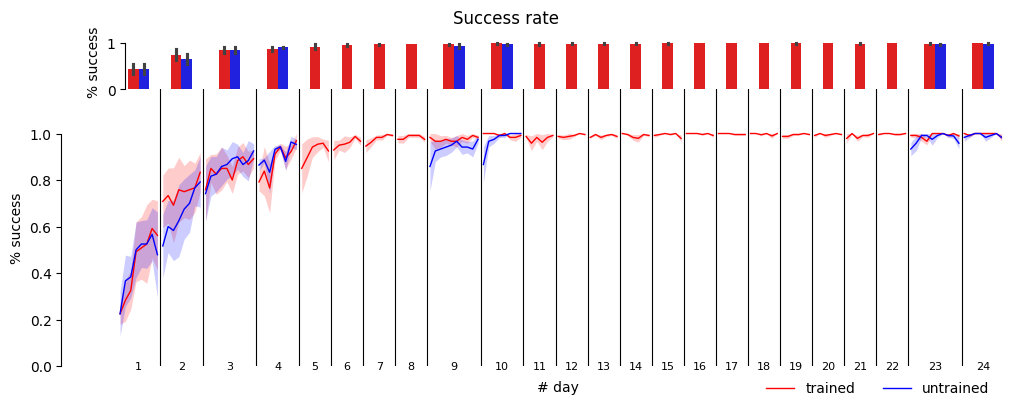

In [20]:
from vis import plot_behav

fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
fig, ax, insets = plot_behav(fig, ax, days, sns, metric='trialPoint', success_only=False, ylim=[0, 1.19])
for inset in insets:
    inset.set_ylim(0, 1.2)
    inset.spines['left'].set_bounds(0, 1)
insets[0].set_ylabel('% success')
ax.set_ylabel('% success')
fig.suptitle('Success rate')
ax.spines['left'].set_bounds(0, 1)
plt.show()

trained vs. untrained, day1: tval=1.212, pval=0.292
trained vs. untrained, day2: tval=0.454, pval=0.674
trained vs. untrained, day3: tval=0.240, pval=0.822
trained vs. untrained, day4: tval=1.446, pval=0.244
trained vs. untrained, day9: tval=-3.341, pval=0.029
trained vs. untrained, day10: tval=-2.368, pval=0.077
trained vs. untrained, day23: tval=-1.779, pval=0.150
trained vs. untrained, day24: tval=-0.979, pval=0.383


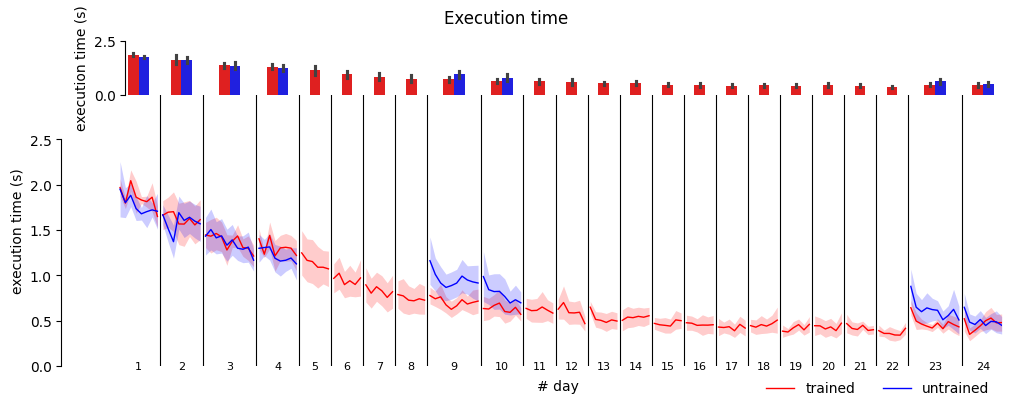

In [21]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
fig, ax, insets = plot_behav(fig, ax, days, sns, metric='ET', success_only=True, ylim=[0, 2.99])
for inset in insets:
    inset.set_ylim(0, 2.5)
    inset.spines['left'].set_bounds(0, 2.5)
insets[0].set_ylabel('execution time (s)')
ax.set_ylabel('execution time (s)')
fig.suptitle('Execution time')
ax.spines['left'].set_bounds(0, 2.5)
plt.show()

trained vs. untrained, day1: tval=-0.075, pval=0.944
trained vs. untrained, day2: tval=-1.257, pval=0.277
trained vs. untrained, day3: tval=0.110, pval=0.918
trained vs. untrained, day4: tval=1.177, pval=0.324
trained vs. untrained, day9: tval=-2.447, pval=0.071
trained vs. untrained, day10: tval=-2.140, pval=0.099
trained vs. untrained, day23: tval=-2.216, pval=0.091
trained vs. untrained, day24: tval=-2.602, pval=0.060


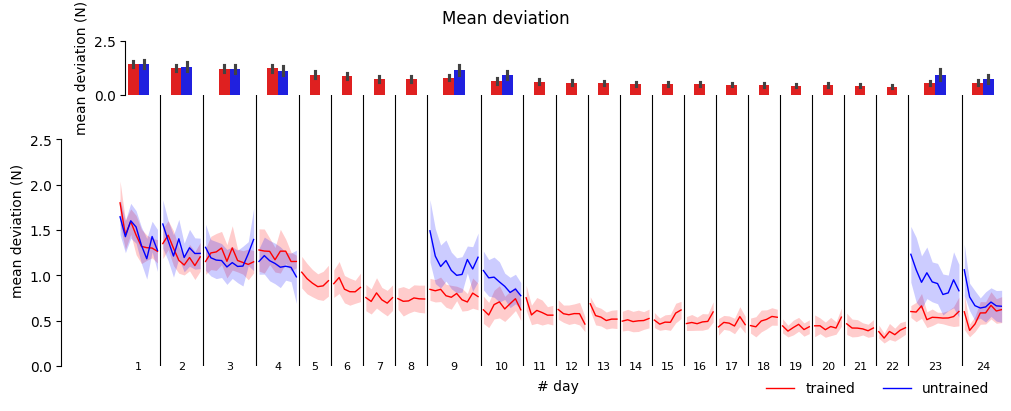

In [22]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
fig, ax, insets = plot_behav(fig, ax, days, sns, metric='MD', success_only=True, ylim=[0, 2.99])
for inset in insets:
    inset.set_ylim(0, 2.5)
    inset.spines['left'].set_bounds(0, 2.5)
insets[0].set_ylabel('mean deviation (N)')
ax.set_ylabel('mean deviation (N)')
fig.suptitle('Mean deviation')
ax.spines['left'].set_bounds(0, 2.5)
plt.show()

trained vs. untrained, day1: tval=0.033, pval=0.975
trained vs. untrained, day2: tval=-0.563, pval=0.604
trained vs. untrained, day3: tval=2.141, pval=0.099
trained vs. untrained, day4: tval=0.779, pval=0.493
trained vs. untrained, day9: tval=2.016, pval=0.114
trained vs. untrained, day10: tval=2.969, pval=0.041
trained vs. untrained, day23: tval=0.376, pval=0.726
trained vs. untrained, day24: tval=5.383, pval=0.006


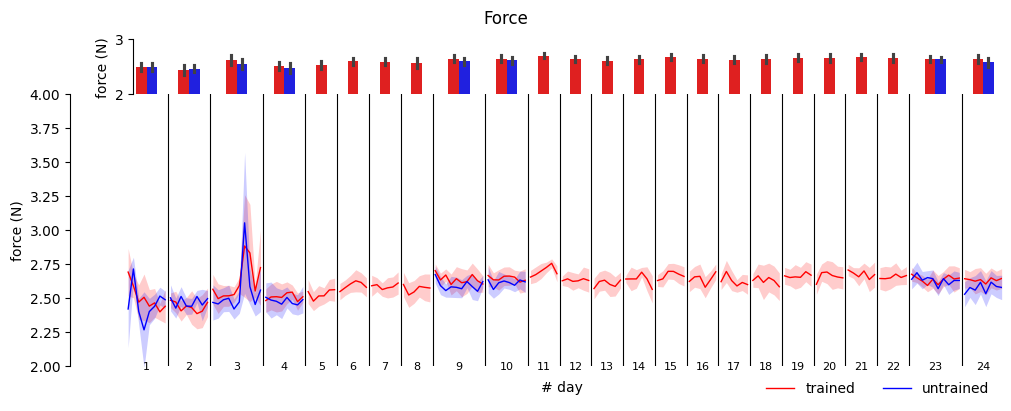

In [23]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
fig, ax, insets = plot_behav(fig, ax, days, sns, metric='force', success_only=True, ylim=[2, 4], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_abs', 'index_abs', 'middle_abs', 'ring_abs', 'pinkie_abs'], var_name='finger',)
for inset in insets:
    inset.set_ylim(2, 3)
    inset.spines['left'].set_bounds(2, 3)
insets[0].set_ylabel('force (N)')
ax.set_ylabel('force (N)')
fig.suptitle('Force')
ax.spines['left'].set_bounds(2, 4)
plt.show()

trained vs. untrained, day1: tval=0.130, pval=0.903
trained vs. untrained, day2: tval=0.871, pval=0.433
trained vs. untrained, day3: tval=0.363, pval=0.735
trained vs. untrained, day4: tval=1.093, pval=0.354
trained vs. untrained, day9: tval=1.386, pval=0.238
trained vs. untrained, day10: tval=0.753, pval=0.493
trained vs. untrained, day23: tval=0.081, pval=0.940
trained vs. untrained, day24: tval=3.397, pval=0.027


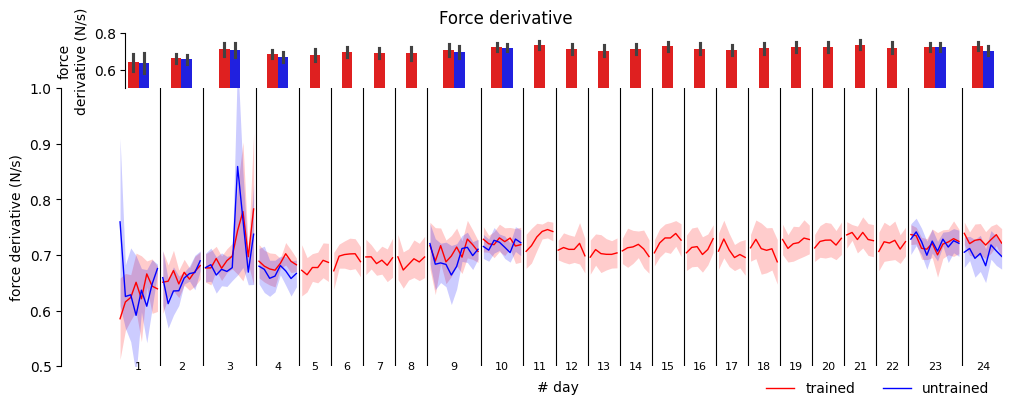

In [24]:
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
fig, ax, insets = plot_behav(fig, ax, days, sns, metric='force_der', success_only=True, ylim=[.5, 1], melt=True, id_vars=['subNum', 'chordID', 'chord', 'TN', 'BN', 'day'],value_vars=['thumb_der', 'index_der', 'middle_der', 'ring_der', 'pinkie_der'], var_name='finger',)
for inset in insets:
    inset.set_ylim(.5, .8)
    inset.spines['left'].set_bounds(.5, .8)
insets[0].set_ylabel('force\nderivative (N/s)')
ax.set_ylabel('force derivative (N/s)')
fig.suptitle('Force derivative')
ax.spines['left'].set_bounds(.5, 1)
plt.show()

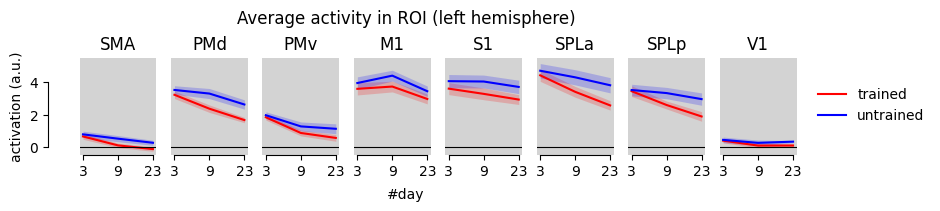

In [25]:
from vis import lineplot_roi_avg

H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
df = pd.read_csv(os.path.join(gl.baseDir, f'glm1', f'ROI.con.avg.tsv'), sep='\t')
fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df, metric='con', hue='chord', hue_order=['trained', 'untrained'], color=['red', 'blue'], label=['trained', 'untrained'],H=H, rois=rois)
axs[0].set_ylim((-.5, 5.5))
axs[0].spines['left'].set_bounds((0, 4))
axs[0].set_ylabel('activation (a.u.)')
fig.supxlabel('#day', fontsize=10)
fig.suptitle('Average activity in ROI (left hemisphere)')
plt.show()

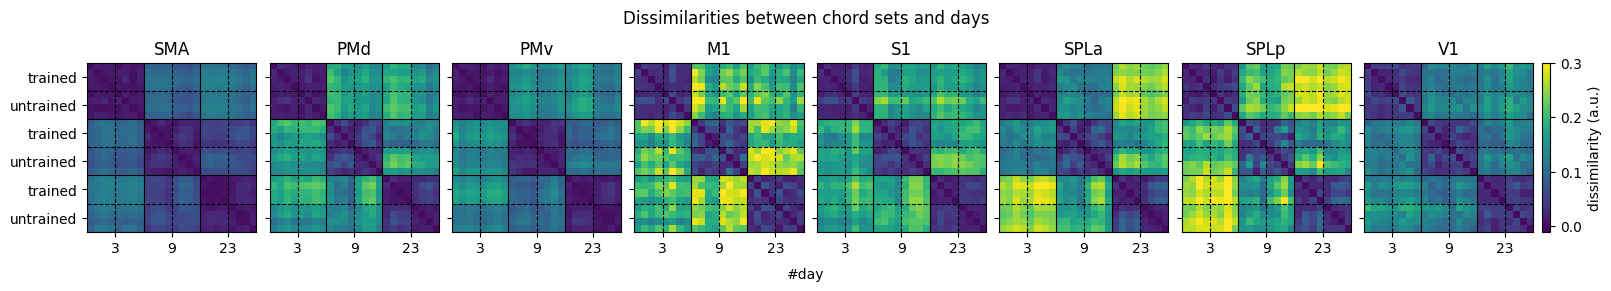

In [26]:
fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(16, 2.8), constrained_layout=True)
vmin, vmax = -.01, .3
for r, roi in enumerate(rois):
    ax = axs[r]
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.{H}.{roi}.npy'))
    D = pcm.G_to_dist(G.mean(axis=0))
    ax.imshow(D, vmin=vmin, vmax=vmax)
    ax.set_title(roi)
    ax.set_xticks([3.5, 11.5, 19.5])
    ax.set_xticklabels([3, 9, 23])
    ax.set_yticks([1.5, 5.5, 9.5, 13.5, 17.5, 21.5])
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(7.5, color='k', lw=.8)
    ax.axhline(15.5, color='k', lw=.8)
    ax.axvline(7.5, color='k', lw=.8)
    ax.axvline(15.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8, ls='--')
    ax.axhline(11.5, color='k', lw=.8, ls='--')
    ax.axhline(19.5, color='k', lw=.8, ls='--')
    ax.axvline(3.5, color='k', lw=.8, ls='--')
    ax.axvline(11.5, color='k', lw=.8, ls='--')
    ax.axvline(19.5, color='k', lw=.8, ls='--')

fig.supxlabel('#day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=.05)
cbar.set_label('dissimilarity (a.u.)')

fig.suptitle('Dissimilarities between chord sets and days')

plt.show()

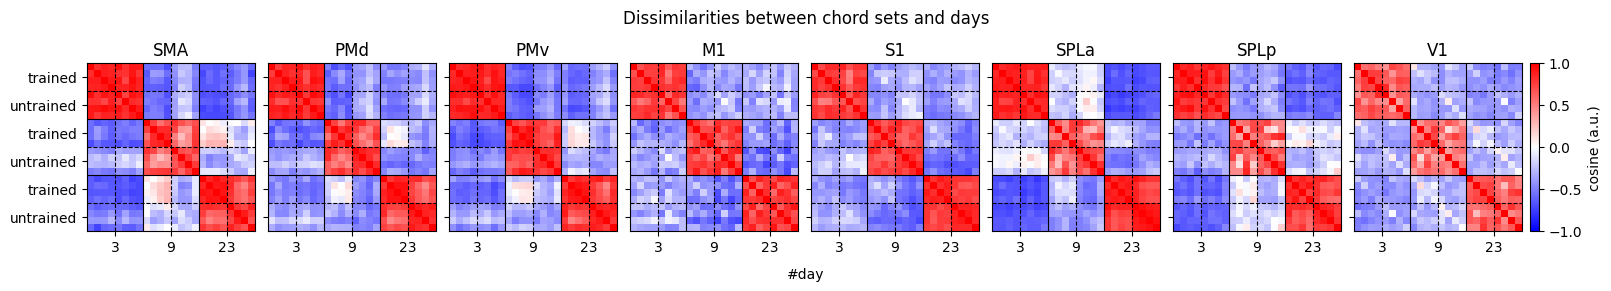

In [27]:
fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(16, 2.8), constrained_layout=True)
vmin, vmax = -1, 1
for r, roi in enumerate(rois):
    ax = axs[r]
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.demean.{H}.{roi}.npy'))
    D = pcm.G_to_cosine(G.mean(axis=0))
    ax.imshow(D, vmin=vmin, vmax=vmax, cmap='bwr')
    ax.set_title(roi)
    ax.set_xticks([3.5, 11.5, 19.5])
    ax.set_xticklabels([3, 9, 23])
    ax.set_yticks([1.5, 5.5, 9.5, 13.5, 17.5, 21.5])
    ax.set_yticklabels(['trained', 'untrained'] * 3)
    ax.axhline(7.5, color='k', lw=.8)
    ax.axhline(15.5, color='k', lw=.8)
    ax.axvline(7.5, color='k', lw=.8)
    ax.axvline(15.5, color='k', lw=.8)
    ax.axhline(3.5, color='k', lw=.8, ls='--')
    ax.axhline(11.5, color='k', lw=.8, ls='--')
    ax.axhline(19.5, color='k', lw=.8, ls='--')
    ax.axvline(3.5, color='k', lw=.8, ls='--')
    ax.axvline(11.5, color='k', lw=.8, ls='--')
    ax.axvline(19.5, color='k', lw=.8, ls='--')

fig.supxlabel('#day', fontsize=10)

cax = ax.get_images()[0]
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=.05)
cbar.set_label('cosine (a.u.)')

fig.suptitle('Dissimilarities between chord sets and days')

plt.show()

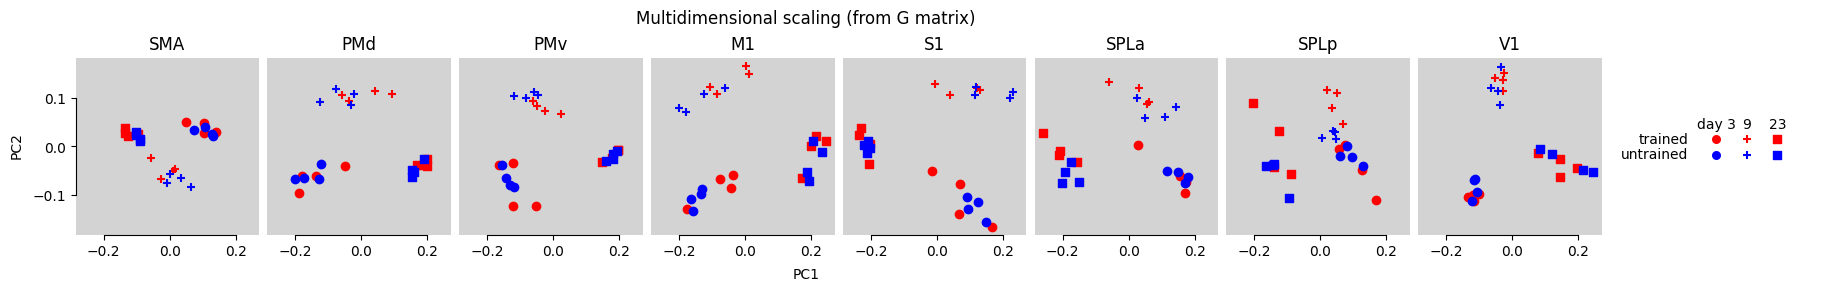

In [28]:
from vis import add_grid_legend

fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(16, 2.8), constrained_layout=True)
vmin, vmax = -.01, .3
marker = ['o', '+', 's']
color = ['red', 'blue']
for r, roi in enumerate(rois):
    ax = axs[r]
    ax.spines[['right', 'top']].set_visible(False) if r==0 else ax.spines[['left', 'top', 'right']].set_visible(False)
    ax.spines[['bottom']].set_bounds(-.2, .2)
    ax.spines[['left']].set_bounds(-.1, .1)
    ax.tick_params(axis='y', left=False) if r>0 else None
    ax.set_title(roi)
    ax.set_facecolor('lightgrey')
    #ax.set_aspect('equal')
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.{H}.{roi}.npy'))
    mds, _ = pcm.classical_mds(G[1])
    for I, i in enumerate(np.arange(0, 24, 4)):
        mds_tmp = mds[i:i + 4]
        ax.scatter(mds_tmp[:, 0], mds_tmp[:, 1], color=color[I % 2], marker=marker[i // 8])

fig.suptitle('Multidimensional scaling (from G matrix)')
fig.supxlabel('PC1', fontsize=10)
fig.supylabel('PC2', fontsize=10)

add_grid_legend(fig,
                anchor=(1.05, .41, 0.08, 0.18),
                col_labels=('day 3','9','23'),
                row_labels=('trained','untrained'),
                markers=marker,
                row_colors=color)

plt.show()

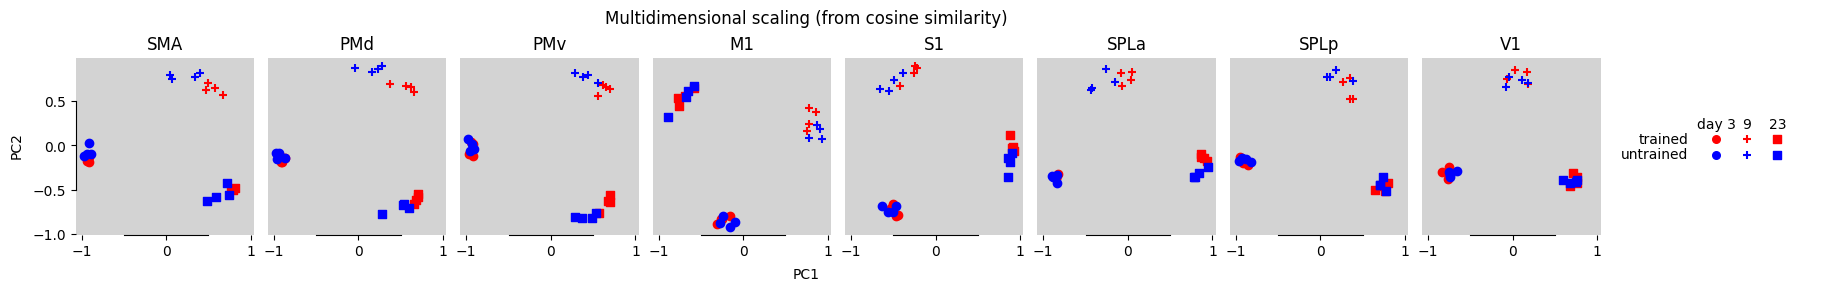

In [29]:
from vis import add_grid_legend

fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(16, 2.8), constrained_layout=True)
vmin, vmax = -.01, .3
marker = ['o', '+', 's']
color = ['red', 'blue']
for r, roi in enumerate(rois):
    ax = axs[r]
    ax.spines[['right', 'top']].set_visible(False) if r==0 else ax.spines[['left', 'top', 'right']].set_visible(False)
    ax.spines[['left', 'bottom']].set_bounds(-.5, .5)
    ax.tick_params(axis='y', left=False) if r>0 else None
    ax.set_title(roi)
    ax.set_facecolor('lightgrey')
    # ax.set_aspect('equal')
    G = np.load(os.path.join(gl.baseDir, gl.pcmDir, f'G_obs.{H}.{roi}.npy'))
    C = pcm.G_to_cosine(G.mean(axis=0))
    mds, _ = pcm.classical_mds(C)
    for I, i in enumerate(np.arange(0, 24, 4)):
        mds_tmp = mds[i:i + 4]
        ax.scatter(mds_tmp[:, 0], mds_tmp[:, 1], color=color[I % 2], marker=marker[i // 8])

fig.suptitle('Multidimensional scaling (from cosine similarity)')
fig.supxlabel('PC1', fontsize=10)
fig.supylabel('PC2', fontsize=10)

add_grid_legend(fig,
                anchor=(1.05, .41, 0.08, 0.18),
                col_labels=('day 3','9','23'),
                row_labels=('trained','untrained'),
                markers=marker,
                row_colors=color)

plt.show()

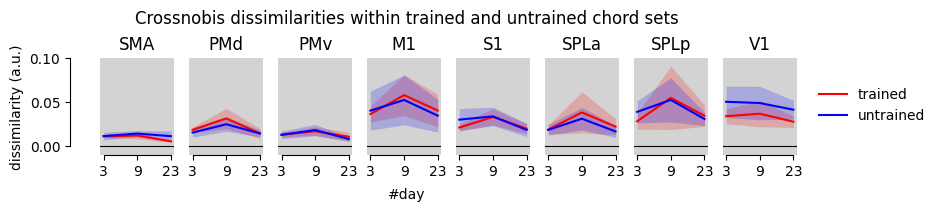

In [30]:
df = pd.read_csv(os.path.join(gl.baseDir, gl.pcmDir, f'dissimilarity.tsv'), sep='\t')
df_melt = df.melt(id_vars=['day', 'roi', 'Hem', 'sn'], var_name='chord', value_name='crossnobis_within', value_vars=['crossnobis_trained', 'crossnobis_untrained'])
fig, axs = plt.subplots(1, len(rois), sharey=True, sharex=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df_melt, metric='crossnobis_within', H='L', rois=rois, color=['red', 'blue'], label=['trained', 'untrained'], hue='chord')
axs[0].set_ylim((-.01, .1))
axs[0].spines['left'].set_bounds((0, .1))
axs[0].set_ylabel('dissimilarity (a.u.)')
fig.supxlabel('#day', fontsize=10)
fig.suptitle('Crossnobis dissimilarities within trained and untrained chord sets')
plt.show()

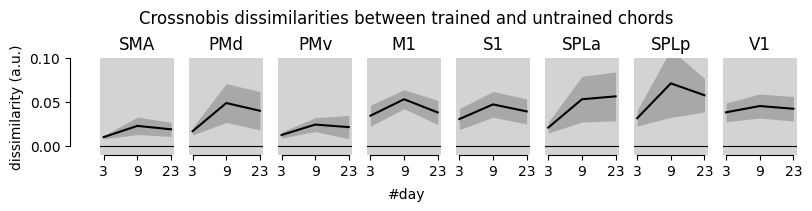

In [31]:
fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(8, 2), constrained_layout=True)
fig, axs = lineplot_roi_avg(fig, axs, df, metric='crossnobis_between', H=H, rois=rois, color='k')
axs[0].set_ylim((-.01, .1))
axs[0].set_ylabel('dissimilarity (a.u.)')
axs[0].spines['left'].set_bounds((0, .1))
fig.suptitle('Crossnobis dissimilarities between trained and untrained chords')
fig.supxlabel('#day', fontsize=10)
plt.show()